In [1]:
from src.models import Wind10Minutes, Station, StationName, StationLocation
import pandas as pd

In [2]:
wind10m = Wind10Minutes()

In [3]:
query = StationName.select().distinct()

for row in query:
    print(row.name)

Xanten (Wasserwerk)
Gelbelsee
Meßstetten-Appental
Straubing
Langquaid-Oberschneidhart
Beerfelden-Vogelherd
Münsingen
Heckelberg
Genthin
Kleiner Feldberg/Taunus
Gera-Leumnitz
Halle-Kröllwitz
Travemünde
Köln-Wahn
Zittau (A)
Falkenberg (Grenzschichtmessfeld)       
Kahler Asten
Quedlinburg
Brandenburg/Havel
Borkum
Neuwied-Feldkirchen-Hüllenberg
Travemünde-Priwall
Neuruppin-Alt Ruppin
Leck
Hoyerswerda
Andernach
Belm
Ummendorf
Putlos
Königswinter-Heiderhof
Querfurt
Bamberg
Bamberg
Stimpfach-Weipertshofen
Potsdam
Nossen
Hersfeld
Altmühlsee
Friesoythe-Edewechterdamm
Wielenbach
Trier-Petrisberg
Haltern (Wasserwerk)
Plauen
Feldberg/Schwarzwald
Flensburg (Schäferhaus)
Lingen
Berlin-Tegel
Kaltennordheim
Goldberg
Emden-Nesserland
Neuglobsow
Arolsen-Volkhardinghausen, Bad
Haaren
Mühldorf
Barth
Schönhagen (Ostseebad)
Haßfurt
Mannhein
Wittenberg
Harzgerode
Augsburg-Kriegshaber
Bocholt-Liedern (Wasserwerk)
Alfeld
Offenbach/Main (Kaiserlei)              
Meiningen
Augsburg
Fichtelberg/Oberfranken
Ulm
W

In [4]:
query = (Wind10Minutes
         .select(Wind10Minutes, StationName.name.alias("sname"))
         .join(StationName, on=(Wind10Minutes.station == StationName.station))
         .where(StationName.name == "Berlin-Tegel")
         .limit(10)
         .execute())



In [9]:
for row in query:
    print(f"{row.stationname.sname}  {row.quality}")

Berlin-Tegel  3
Berlin-Tegel  3
Berlin-Tegel  3
Berlin-Tegel  3
Berlin-Tegel  3
Berlin-Tegel  3
Berlin-Tegel  3
Berlin-Tegel  3
Berlin-Tegel  3
Berlin-Tegel  3


In [6]:
query.columns

['id',
 'station',
 'timestamp',
 'quality',
 'avg_speed',
 'avg_direction',
 'sname']

## Benötigte Daten

Wenn zum Beispiel TimeSeries Modelle entwickelt werden sollen, benötigen wir die Uhrzeit, die Position und sowohl Windgeschwindigkeit als auch Richtung.

In [8]:
join_predicates = (
    (Wind10Minutes.station == StationLocation.station)
    &(
        (
                (StationLocation.from_date <= Wind10Minutes.timestamp)
                &(Wind10Minutes.timestamp <= StationLocation.to_date)
        ) | (
                (StationLocation.to_date is None) 
                &(StationLocation.from_date <= Wind10Minutes.timestamp))
    )
)



query = (Wind10Minutes
         .select(
            Wind10Minutes.timestamp, 
            StationLocation.latitude,
            StationLocation.longitude,
            Wind10Minutes.avg_speed,
            Wind10Minutes.avg_direction)
         .join(StationLocation, on=join_predicates)
         .join(StationName, on=(Wind10Minutes.station == StationName.station))
         .where(StationName.name == "Berlin-Tegel")
         .order_by(Wind10Minutes.timestamp)
         .limit(10)
         .execute())


In [9]:
for row in query:
    #print(dir(row))
    #break
    print(row.timestamp, row.stationlocation.latitude, row.stationlocation.longitude, row.avg_speed, row.avg_direction)

2020-01-01 00:00:00 52.5644 13.3088 3.0 270
2020-01-01 00:10:00 52.5644 13.3088 3.6 270
2020-01-01 00:20:00 52.5644 13.3088 3.6 280
2020-01-01 00:30:00 52.5644 13.3088 3.1 280
2020-01-01 00:40:00 52.5644 13.3088 3.3 280
2020-01-01 00:50:00 52.5644 13.3088 2.8 280
2020-01-01 01:00:00 52.5644 13.3088 2.7 290
2020-01-01 01:10:00 52.5644 13.3088 2.9 280
2020-01-01 01:20:00 52.5644 13.3088 3.0 280
2020-01-01 01:30:00 52.5644 13.3088 2.9 280


In [13]:
df = Wind10Minutes.get_timeseries_by_station_name("Berlin-Tegel", start_date="2019-01-01")


In [14]:
df.head()

,timestamp,latitude,longitude,avg_speed,avg_direction
0,2020-01-01 00:00:00,52.5644,13.3088,3.0,270
1,2020-01-01 00:10:00,52.5644,13.3088,3.6,270
2,2020-01-01 00:20:00,52.5644,13.3088,3.6,280
3,2020-01-01 00:30:00,52.5644,13.3088,3.1,280
4,2020-01-01 00:40:00,52.5644,13.3088,3.3,280


<Axes: xlabel='timestamp'>

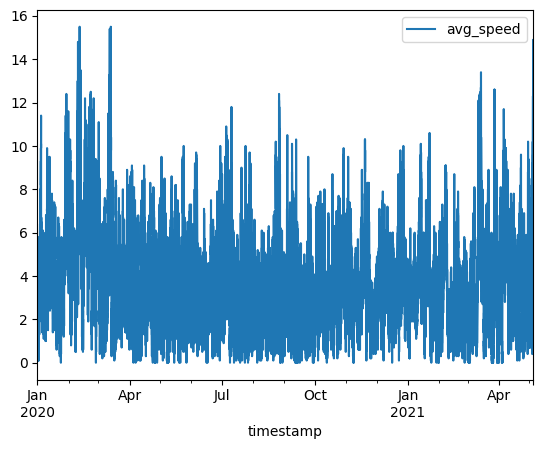

In [15]:
df.plot(x="timestamp", y="avg_speed")